In [95]:
import pandas as pd
from sklearn import preprocessing
import time
import matplotlib
% matplotlib inline

In [2]:
from collections import Counter
from tqdm import tqdm
import random
from scipy import sparse
import numpy as np

In [3]:
train_pd = pd.read_csv("./data/train.csv", encoding="utf-8")

In [4]:
Counter(train_pd.label)

Counter({0: 27500, 1: 2500})

In [5]:
2500/3000

0.8333333333333334

In [6]:
word_list = []
vocab_list = []
for line in tqdm(train_pd.value):
    word_list.append([w for w in line])
    vocab_list.extend([w for w in line])

100%|█████████████████████████████████████████████████████████████████████████| 30000/30000 [00:00<00:00, 90943.34it/s]


In [7]:
c = Counter(vocab_list)
vocab = np.array(list(c.keys()))
vocab.sort()
vocab

array(['%', '&', '*', '+', '-', '.', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '=', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
       'W', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h',
       'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
       'v', 'w', 'x', 'y', 'z'],
      dtype='<U1')

In [8]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(vocab)
label_encoder.classes_
label_encoder.transform(vocab)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69], dtype=int64)

In [9]:
word_labelencoder = [list(label_encoder.transform(w)) for w in word_list]

In [10]:
word_labelencoder[0]
label_encoder.inverse_transform(word_labelencoder[0])

array(['k', 'e', 'y', 'o', 'n', 'e', '=', 'R', '8', '9', 'y', '0', 'w',
       'd', 'I', 'l', 'T', 'H', 'A', '2', 'z', 'g', 'y', 'd', '1', 'C',
       'C', '&', 'k', 'e', 'y', 't', 'w', 'o', '=', 'j', 'Q', 'u', 'e',
       'r', 'y', '2', '1', '4', '0', '5', '6', '2', '4', '6', '5', '1',
       '8', '8', '0', '3', '5', '2', '1', '6', '7', '_', '1', '4', '7',
       '8', '1', '4', '5', '2', '3', '3', '2', '2', '2'],
      dtype='<U1')

In [11]:
x_batch = np.array(word_labelencoder.copy())
y_batch = np.array(train_pd.label.copy())
# len(x), len(y)
x_batch.shape, y_batch.shape

((30000,), (30000,))

In [12]:
x_batch_size = [len(i) for i in x_batch]

In [13]:
max_size = np.max(x_batch_size)
max_size

11553

In [104]:
x_batch_size_pd = pd.DataFrame(x_batch_size, columns=['len'])
x_batch_size_pd['label'] = train_pd.label

In [105]:
x_batch_size_pd.describe()

,len,label
count,30000.000000,30000.000000
mean,113.928533,0.083333
std,173.427420,0.276390
min,16.000000,0.000000
25%,53.000000,0.000000
50%,73.000000,0.000000
75%,100.000000,0.000000
max,11553.000000,1.000000


In [112]:
x_batch_size_pd[x_batch_size_pd.label == 1].describe()

,len,label
count,2500.00000,2500.0
mean,334.79320,1.0
std,193.83319,0.0
min,38.00000,1.0
25%,177.00000,1.0
50%,289.00000,1.0
75%,463.00000,1.0
max,1187.00000,1.0


In [113]:
x_batch_size_pd[x_batch_size_pd.label == 0].describe()

,len,label
count,27500.000000,27500.0
mean,93.849927,0.0
std,156.713548,0.0
min,16.000000,0.0
25%,50.000000,0.0
50%,69.000000,0.0
75%,90.000000,0.0
max,11553.000000,0.0


In [106]:
Counter(x_batch_size_pd.label)

Counter({0: 27500, 1: 2500})

In [109]:
x_batch_size_pd_100 = x_batch_size_pd[x_batch_size_pd.len <= 1000]
Counter(x_batch_size_pd_100.label)

Counter({0: 27350, 1: 2497})

In [110]:
x_batch_size_pd = x_batch_size_pd.sort_values(['len'])

In [111]:
x_batch_size_pd[x_batch_size_pd]

ValueError: Must pass DataFrame with boolean values only

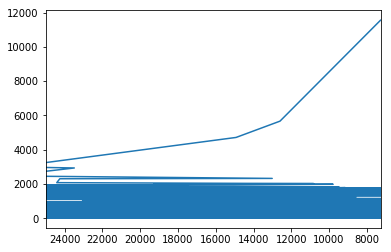

In [102]:
x_batch_size_pd.len.plot()

In [14]:
x_batch_pad = []
for x in tqdm(x_batch[:]):
    list_test = list()
    list_test = np.array([-1] * max_size)
    list_test[:len(x)] = x
    x_batch_pad.append(list_test)

100%|██████████████████████████████████████████████████████████████████████████| 30000/30000 [00:20<00:00, 1482.67it/s]


In [15]:
x_batch_pad = np.array(x_batch_pad)
x_pos = x_batch_pad[y_batch==1]
x_pos.shape

(2500, 11553)

In [16]:
x_neg = x_batch_pad[y_batch==0]
x_neg_index = np.array(range(len(x_neg)))
x_neg_index = np.random.choice(x_neg_index, size=2500)
x_neg = x_neg[x_neg_index]
x_neg.shape

(2500, 11553)

In [17]:
x_pos.shape, x_neg.shape

((2500, 11553), (2500, 11553))

In [18]:
# x_batch = np.append(x_pos, x_neg)
x_batch = np.vstack([x_pos, x_neg])
# x = np.array(list(x_pos).extend(x_neg))
y_batch = np.concatenate([[1]*len(x_pos), [0]*len(x_neg)])

In [19]:
x_batch

array([[54, 48, 68, ..., -1, -1, -1],
       [54, 48, 68, ..., -1, -1, -1],
       [54, 48, 68, ..., -1, -1, -1],
       ..., 
       [54, 48, 68, ..., -1, -1, -1],
       [54, 48, 68, ..., -1, -1, -1],
       [54, 48, 68, ..., -1, -1, -1]])

In [20]:
index = np.arange(len(x_batch))
np.random.shuffle(index)

x_batch = x_batch[index]
y_batch = y_batch[index]

In [21]:
x_batch.shape

(5000, 11553)

In [22]:
5000*0.8

4000.0

In [23]:
x_batch[0].shape

(11553,)

In [24]:
x_batch[1].shape

(11553,)

In [38]:
class Batcher():
    def __init__(self, x, y, x_batch_size):
        self.train_size = int(len(x)*0.8)
        self.train_x = x[:self.train_size]
        self.train_y = y[:self.train_size]
        self.test_x = x[self.train_size:]
        self.test_y = y[self.train_size:]
        self.x_batch_size = np.array(x_batch_size)
        self.start = 0
    def next_batch(self, batch_size):
        s_index = self.start
        e_index = self.start + batch_size
        if e_index >= self.train_size:
            self.start = 0
            s_index = self.start
            e_index = self.start + batch_size
        self.start = e_index
        return self.train_x[s_index:e_index], self.train_y[s_index:e_index], self.x_batch_size[s_index:e_index]

In [79]:
np.asarray(10)

TypeError: iteration over a 0-d array

In [26]:
import tensorflow as tf

In [47]:
#定义一些常量
#图片大小，32 x 256
OUTPUT_SHAPE = (len(vocab),256)

#训练最大轮次
num_epochs = 10000
#LSTM
num_hidden = 64
num_layers = 1
num_classes = 2

# obj = gen_id_card()
# num_classes = obj.len + 1 + 1  # 10位数字 + blank + ctc blank

#初始化学习速率
INITIAL_LEARNING_RATE = 1e-3
DECAY_STEPS = 5000
REPORT_STEPS = 100
LEARNING_RATE_DECAY_FACTOR = 0.9  # The learning rate decay factor
MOMENTUM = 0.9

DIGITS='0123456789'
BATCHES = 200
BATCH_SIZE = 50
TRAIN_SIZE = BATCHES * BATCH_SIZE

In [80]:
def get_train_model():
    inputs = tf.placeholder(tf.float32, [None, 11553, OUTPUT_SHAPE[0]])
    targets = tf.placeholder(tf.int32, [None])
    seq_len = tf.placeholder(tf.int32, [None])
    
    with tf.name_scope("lstm"):
        # LSTM
#         cell = tf.contrib.rnn.LSTMCell(num_hidden, state_is_tuple=True)
#         stack = tf.contrib.rnn.MultiRNNCell([cell] * num_layers, state_is_tuple=True)
#         outputs, _ = tf.nn.dynamic_rnn(cell, inputs, seq_len, dtype=tf.float32)
        
        cell = tf.nn.rnn_cell.GRUCell(num_units=num_hidden,)
        stack = tf.nn.rnn_cell.MultiRNNCell([cell for _ in range(num_layers)],state_is_tuple=True)
        outputs, _ = tf.nn.dynamic_rnn(cell, inputs, seq_len, dtype=tf.float32)

        shape = tf.shape(inputs)
        # [batch_size,256]
        batch_s, max_timesteps = shape[0], shape[1]

        # [batch_size*max_time_step,num_hidden]
        outputs = tf.reshape(outputs, [-1, num_hidden])
        W = tf.Variable(tf.truncated_normal([num_hidden,  num_classes], stddev=0.1), name="W")
        b = tf.Variable(tf.constant(0.0, shape=[num_classes]), name="b")
        # [batch_size*max_timesteps,num_classes]
        logits = tf.matmul(outputs, W) + b
        # [batch_size,max_timesteps,num_classes]
        logits = tf.reshape(logits, [batch_s, -1, num_classes])
        # 转置矩阵，第0和第1列互换位置=>[max_timesteps,batch_size,num_classes]
        logits = tf.transpose(logits, (1, 0, 2))
    
    return logits, inputs, targets, seq_len, W, b

In [81]:
tf.reset_default_graph()
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(INITIAL_LEARNING_RATE,
                                                global_step,
                                                DECAY_STEPS,
                                                LEARNING_RATE_DECAY_FACTOR,
                                                staircase=True)
with tf.name_scope("rnn"):
    logits, inputs, targets, seq_len, W, b = get_train_model()

In [84]:
logits

<tf.Tensor 'rnn/lstm/transpose_1:0' shape=(?, ?, 2) dtype=float32>

In [83]:
# tragets是一个稀疏矩阵
# loss = tf.nn.ctc_loss(labels=targets,inputs=logits, sequence_length=seq_len)
# cost = tf.reduce_mean(loss)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=targets, logits=logits))
    
#optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=MOMENTUM).minimize(cost, global_step=global_step)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss,global_step=global_step)

ValueError: Tensor("rnn/gru_cell/gates/kernel:0", shape=(134, 128), dtype=float32_ref) must be from the same graph as Tensor("CTCLoss:0", shape=(?,), dtype=float32).

In [74]:
train_inputs, train_targets, train_seq_len = sqli.next_batch(BATCH_SIZE)
train_inputs[0].shape, train_seq_len.shape

((11553, 70), (50,))

In [71]:
def do_batch():
#     train_inputs, train_targets, train_seq_len = get_next_batch(BATCH_SIZE)
    train_inputs, train_targets, train_seq_len = sqli.next_batch(BATCH_SIZE)
#     print(train_inputs, train_targets, train_seq_len)

    feed = {inputs: train_inputs, targets: train_targets, seq_len: train_seq_len}

    b_loss,b_targets, b_logits, b_seq_len,b_cost, steps, _ = session.run([loss, targets, logits, seq_len, cost, global_step, optimizer], feed)

    print(b_cost, steps)
    if steps > 0 and steps % REPORT_STEPS == 0:
#         do_report()
        save_path = saver.save(session, "ocr.model", global_step=steps)
    return b_cost, steps

In [32]:
# label_encoder.transform(vocab)

In [ ]:
x_batch = [np.eye(len(vocab))[item] for item in x_batch_pad]
# x_batch = [np.eye(len(vocab))[item] for item in x_batch]

In [34]:
# BATCH_SIZE

In [45]:
x_batch[0].shape

(11553, 70)

In [72]:
init = tf.global_variables_initializer()
sqli = Batcher(x_batch,y_batch,x_batch_size)
with tf.Session() as session:
    session.run(init)
    saver = tf.train.Saver(tf.global_variables(), max_to_keep=100)
    for curr_epoch in range(num_epochs):
        print("Epoch.......", curr_epoch)
        train_cost = train_ler = 0
        for batch in range(BATCHES):
            start = time.time()
            c, steps = do_batch()
            train_cost += c * BATCH_SIZE
            seconds = time.time() - start
            print("Step:", steps, ", batch seconds:", seconds)
            
        train_cost /= TRAIN_SIZE
            
#         train_inputs, train_targets, train_seq_len = get_next_batch(BATCH_SIZE)
#         train_inputs, train_targets, train_seq_len = sqli.next_batch(BATCH_SIZE)
        print(train_inputs, train_targets, train_seq_len)
        train_inputs = sqli.test_x
        train_targets = sqli.test_y
        train_seq_len = [len(w) for w in train_inputs]
        val_feed = {inputs: train_inputs,
                        targets: train_targets,
                        seq_len: train_seq_len}
 
        val_cost, val_ler, lr, steps = session.run([cost, acc, learning_rate, global_step], feed_dict=val_feed)
 
        log = "Epoch {}/{}, steps = {}, train_cost = {:.3f}, train_ler = {:.3f}, val_cost = {:.3f}, val_ler = {:.3f}, time = {:.3f}s, learning_rate = {}"
        print(log.format(curr_epoch + 1, num_epochs, steps, train_cost, train_ler, val_cost, val_ler, time.time() - start, lr))

Epoch....... 0


ValueError: Cannot feed value of shape () for Tensor 'rnn/Placeholder_3:0', which has shape '(?, ?)'

In [36]:
def train():
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.train.exponential_decay(INITIAL_LEARNING_RATE,
                                                global_step,
                                                DECAY_STEPS,
                                                LEARNING_RATE_DECAY_FACTOR,
                                                staircase=True)
    logits, inputs, targets, seq_len, W, b = get_train_model()
    
    # tragets是一个稀疏矩阵
    loss = tf.nn.ctc_loss(labels=targets,inputs=logits, sequence_length=seq_len)
    cost = tf.reduce_mean(loss)
    
    #optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=MOMENTUM).minimize(cost, global_step=global_step)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss,global_step=global_step)
    
    #前面说的划分块之后找每块的类属概率分布，ctc_beam_search_decoder方法,是每次找最大的K个概率分布
    #还有一种贪心策略是只找概率最大那个，也就是K=1的情况ctc_ greedy_decoder
    decoded, log_prob = tf.nn.ctc_beam_search_decoder(logits, seq_len, merge_repeated=False)
    
    acc = tf.reduce_mean(tf.edit_distance(tf.cast(decoded[0], tf.int32), targets))
    
    init = tf.global_variables_initializer()

    def report_accuracy(decoded_list, test_targets):
        original_list = decode_sparse_tensor(test_targets)
        detected_list = decode_sparse_tensor(decoded_list)
        true_numer = 0
        
        if len(original_list) != len(detected_list):
            print("len(original_list)", len(original_list), "len(detected_list)", len(detected_list),
                  " test and detect length desn't match")
            return
        print("T/F: original(length) <-------> detectcted(length)")
        for idx, number in enumerate(original_list):
            detect_number = detected_list[idx]
            hit = (number == detect_number)
            print(hit, number, "(", len(number), ") <-------> ", detect_number, "(", len(detect_number), ")")
            if hit:
                true_numer = true_numer + 1
        print("Test Accuracy:", true_numer * 1.0 / len(original_list))

    def do_report():
        test_inputs,test_targets,test_seq_len = get_next_batch(BATCH_SIZE)
        test_feed = {inputs: test_inputs,
                     targets: test_targets,
                     seq_len: test_seq_len}
        dd, log_probs, accuracy = session.run([decoded[0], log_prob, acc], test_feed)
        report_accuracy(dd, test_targets)
 
    def do_batch():
        train_inputs, train_targets, train_seq_len = get_next_batch(BATCH_SIZE)
        
        feed = {inputs: train_inputs, targets: train_targets, seq_len: train_seq_len}
        
        b_loss,b_targets, b_logits, b_seq_len,b_cost, steps, _ = session.run([loss, targets, logits, seq_len, cost, global_step, optimizer], feed)
        
        print(b_cost, steps)
        if steps > 0 and steps % REPORT_STEPS == 0:
            do_report()
            save_path = saver.save(session, "ocr.model", global_step=steps)
        return b_cost, steps
    
    with tf.Session() as session:
        session.run(init)
        saver = tf.train.Saver(tf.global_variables(), max_to_keep=100)
        for curr_epoch in xrange(num_epochs):
            print("Epoch.......", curr_epoch)
            train_cost = train_ler = 0
            for batch in xrange(BATCHES):
                start = time.time()
                c, steps = do_batch()
                train_cost += c * BATCH_SIZE
                seconds = time.time() - start
                print("Step:", steps, ", batch seconds:", seconds)
            
            train_cost /= TRAIN_SIZE
            
            train_inputs, train_targets, train_seq_len = get_next_batch(BATCH_SIZE)
            val_feed = {inputs: train_inputs,
                        targets: train_targets,
                        seq_len: train_seq_len}
 
            val_cost, val_ler, lr, steps = session.run([cost, acc, learning_rate, global_step], feed_dict=val_feed)
 
            log = "Epoch {}/{}, steps = {}, train_cost = {:.3f}, train_ler = {:.3f}, val_cost = {:.3f}, val_ler = {:.3f}, time = {:.3f}s, learning_rate = {}"
            print(log.format(curr_epoch + 1, num_epochs, steps, train_cost, train_ler, val_cost, val_ler, time.time() - start, lr))